# INFORMACION ACERCA DEL CONJUNTO DE DATOS
* FTHG = Goles del equipo local a tiempo completo
* FTAG	Goles del equipo visitante a tiempo completo
* FTR	Resultado de tiempo completo (H = victoria local, D = empate, A = victoria visitante)
* HTHG	Goles del equipo local en el descanso
* HTAG	Goles del equipo visitante en el medio tiempo
* HTR	Resultado del medio tiempo (H = victoria local, D = empate, A = victoria visitante)
* AS	Tiros del equipo local
* HS    Tiros del equipo visitante
* HST	Tiros a puerta del equipo local
* AST	Tiros del equipo visitante al arco
* HC	Córners del equipo local
* C.A.	Córners del equipo visitante
* AF	Faltas cometidas por el equipo local
* FA	Faltas cometidas por el equipo visitante
* HY	Tarjetas amarillas del equipo local
* SÍ	Tarjetas amarillas del equipo visitante
* HORA	Tarjetas rojas del equipo local
* AR	Tarjetas rojas del equipo visitante

### Cambiare los nombres luego, asi se es mas facil de entenderolo

https://www.kaggle.com/datasets/irkaal/english-premier-league-results

https://www.linkedin.com/pulse/linkedin-top-companies-2023-las-25-mejores-1c/ MEJORES EMPLEOS EN LINKEDIN


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("EPL-estadistica.csv", encoding="latin-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [3]:
data = data.rename(columns={"FTHG":"goles_local", "FTAG":"goles_visita", "FTR":"resultado","HTHG":"goles_local2T",
                            "HTAG":"goles_visitante2T","HTR":"resultado_1T", "AS":"tiros_visita","HS":"tiros_local",
                            "HST":"tiros_arco_local" , "AST":"tiros_arco_visita","HC":"corners_local","AC":"corners_visita",
                           "HF":"faltas_hechas_L","AF":"faltas_hechas_V","HY":"amarillas_local","HR":"rojas_local",
                           "AR":"rojas_visita","AY":"amarillas_visita","AwayTeam":"visitante","HomeTeam":"local",
                           "Season":"temporada" , "DateTime":"dia-hora"})

## Cambiaremos los nombres de casi todas las columnas para que sea mas legible.
----

In [4]:
data.tail()

,temporada,dia-hora,local,visitante,goles_local,goles_visita,resultado,goles_local2T,goles_visitante2T,resultado_1T,...,tiros_arco_local,tiros_arco_visita,corners_local,corners_visita,faltas_hechas_L,faltas_hechas_V,amarillas_local,amarillas_visita,rojas_local,rojas_visita
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


* Cambiamos los nombres de las columnas para que se pueda entender mucho mas 
-----

In [5]:
data.describe()

,goles_local,goles_visita,goles_local2T,goles_visitante2T,tiros_local,tiros_visita,tiros_arco_local,tiros_arco_visita,corners_local,corners_visita,faltas_hechas_L,faltas_hechas_V,amarillas_local,amarillas_visita,rojas_local,rojas_visita
count,11113.000000,11113.000000,10189.000000,10189.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.518222,1.141456,0.684758,0.501031,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,1.301981,1.135907,0.836299,0.722299,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


**Observación**
* La media de goles local es mas alta que la visitante (Local=1.51 - Visitante=1.14).
* Los goles en el 2do timepo también tiene una media mas alta (Local=0.68 - Visitante=0.50).
* La media de tiros del equipo vistante es mas alta que la local (Local=10.6 - Visitante=13.5).
    * Pero podemos ver que es mas efectivos los tiros al arco del equipo local que del visitante (Local=6.11 - Visitante=4.76).
* La media de los corners también siguen siendo a favor de los equipos locar (Local=6.08 - Visitante=4.78).
* En faltas cometidas, La media tanto en los equipos localos como los visitante no tienen diferencias (Local=11.3 - Visitante=11.8).
* En caso de las amarillas tanto del equipo local como el visitante también es muy parecida(Local=1.41 - Visitante=1.74).
* La tarjetas rojas por su parte tanto en los equipos visitantes como de los locales son similares (Local=0.062 - Visitante=0.089).

**Teniendo en cuenta los datos que tenemos, es mejor el desempeño para los equipos jungado de local en su propia cancha que de visitante.**

In [6]:
data.shape #11113 FILAR y 23 COLUMNAS

(11113, 23)

In [7]:
data.isna().sum()

temporada               0
dia-hora                0
local                   0
visitante               0
goles_local             0
goles_visita            0
resultado               0
goles_local2T         924
goles_visitante2T     924
resultado_1T          924
Referee              2824
tiros_local          2824
tiros_visita         2824
tiros_arco_local     2824
tiros_arco_visita    2824
corners_local        2824
corners_visita       2824
faltas_hechas_L      2824
faltas_hechas_V      2824
amarillas_local      2824
amarillas_visita     2824
rojas_local          2824
rojas_visita         2824
dtype: int64

* Tenemos varias filas sin datos, podemos ver que son el mismo numero de N/A para dichas columnas

(-0.10000000000000002, 2.1, 0.0, 7955.85)

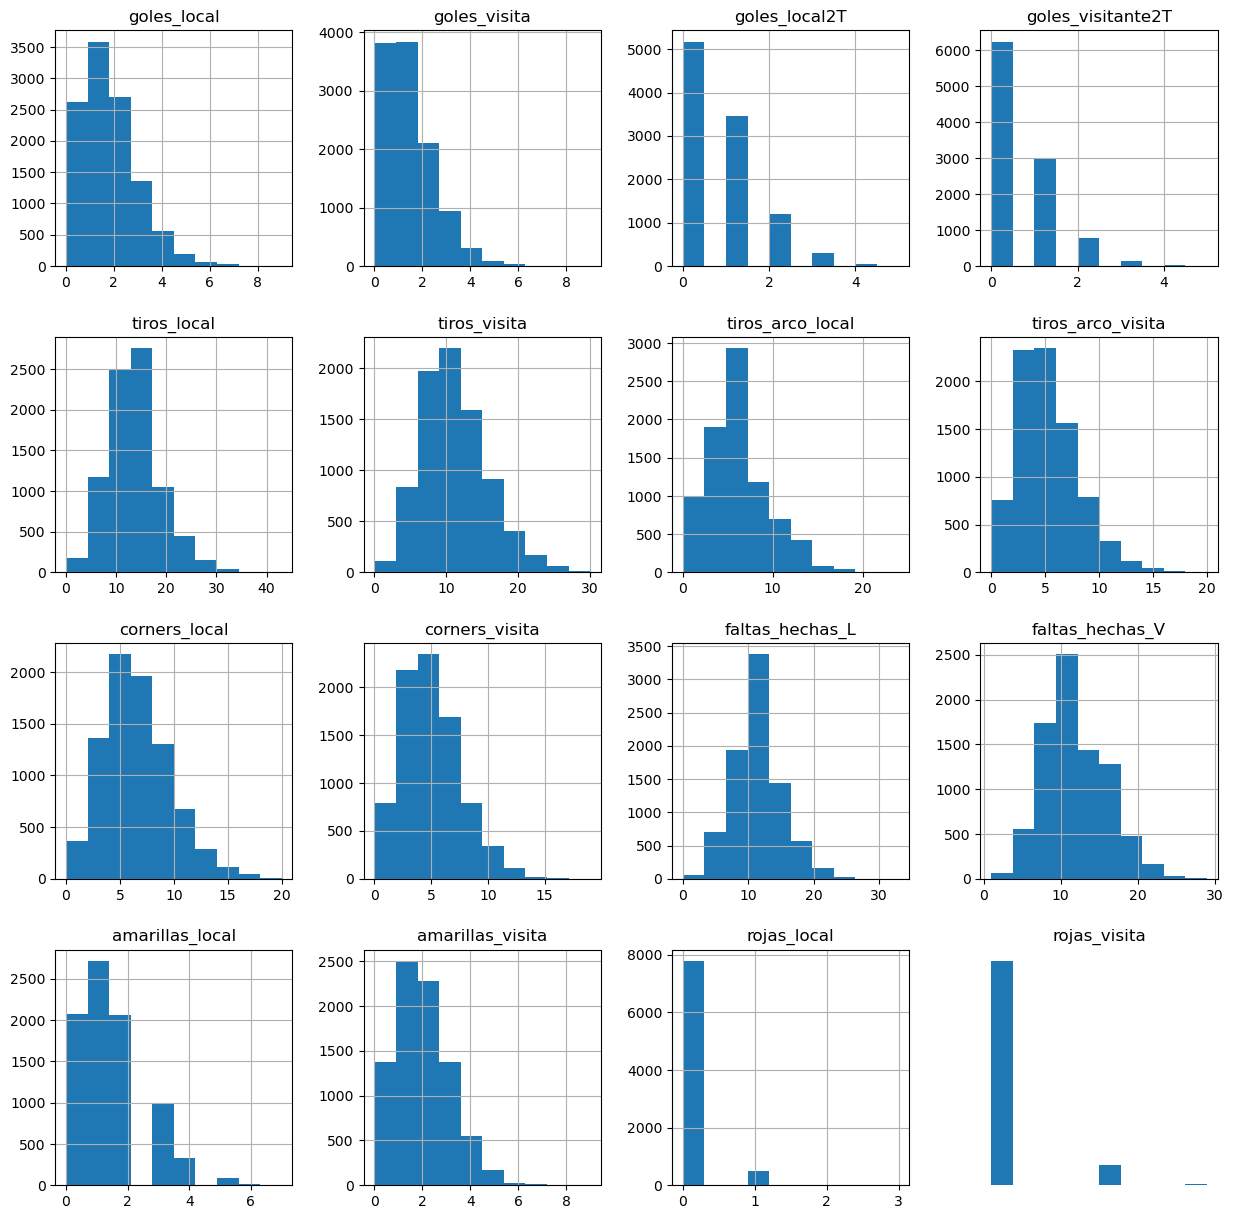

In [8]:
data.hist(figsize=(15,15))
plt.axis("off")

# Tomaremos al equipo del liverpool para hacer alguna que otra prediccion.

In [9]:
liverpool_local = data.loc[data["local"].str.contains("Liverpool")]
print("Contenido de filas:",len(liverpool_local))

Contenido de filas: 551


In [10]:
liverpool_visitante = data.loc[data["visitante"].str.contains("Liverpool")]
print("Contenido de filas:",len(liverpool_visitante))

Contenido de filas: 552


In [11]:
print("Valores N/A Local:",sum(liverpool_local.isna().sum()))
print("Valores N/A VIsitante:",sum(liverpool_visitante.isna().sum()))

Valores N/A Local: 1907
Valores N/A VIsitante: 1907


**Observación**
* Tendremos que reemplazar los valores N/A por valores Numericos, es decir 0. Asi podremos hacer un analisis predictivo
----

In [12]:
liverpool_local.fillna(int(0),  inplace=True)
liverpool_visitante.fillna(int(0),  inplace=True)
### Nos fijamos si logro con exitos el remplazo de los valores N/A por 0
print("Valores N/A Local:",sum(liverpool_local.isna().sum()))
print("Valores N/A VIsitante:",sum(liverpool_visitante.isna().sum()))

Valores N/A Local: 0
Valores N/A VIsitante: 0


C:\Users\Acer\AppData\Local\Temp\ipykernel_14296\3747353273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_local.fillna(int(0),  inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14296\3747353273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_visitante.fillna(int(0),  inplace=True)


-------
## Lo que podremos hacer ahora es mirar su correlación
* ## mas fuerte sea el color azul mas fuerte es su correlacion, el numero que se encuentra dentro de cada cuadrado es su nivel de correlación con su respectiva columna.

C:\Users\Acer\AppData\Local\Temp\ipykernel_14296\2066272546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_liv = liverpool_local.corr()


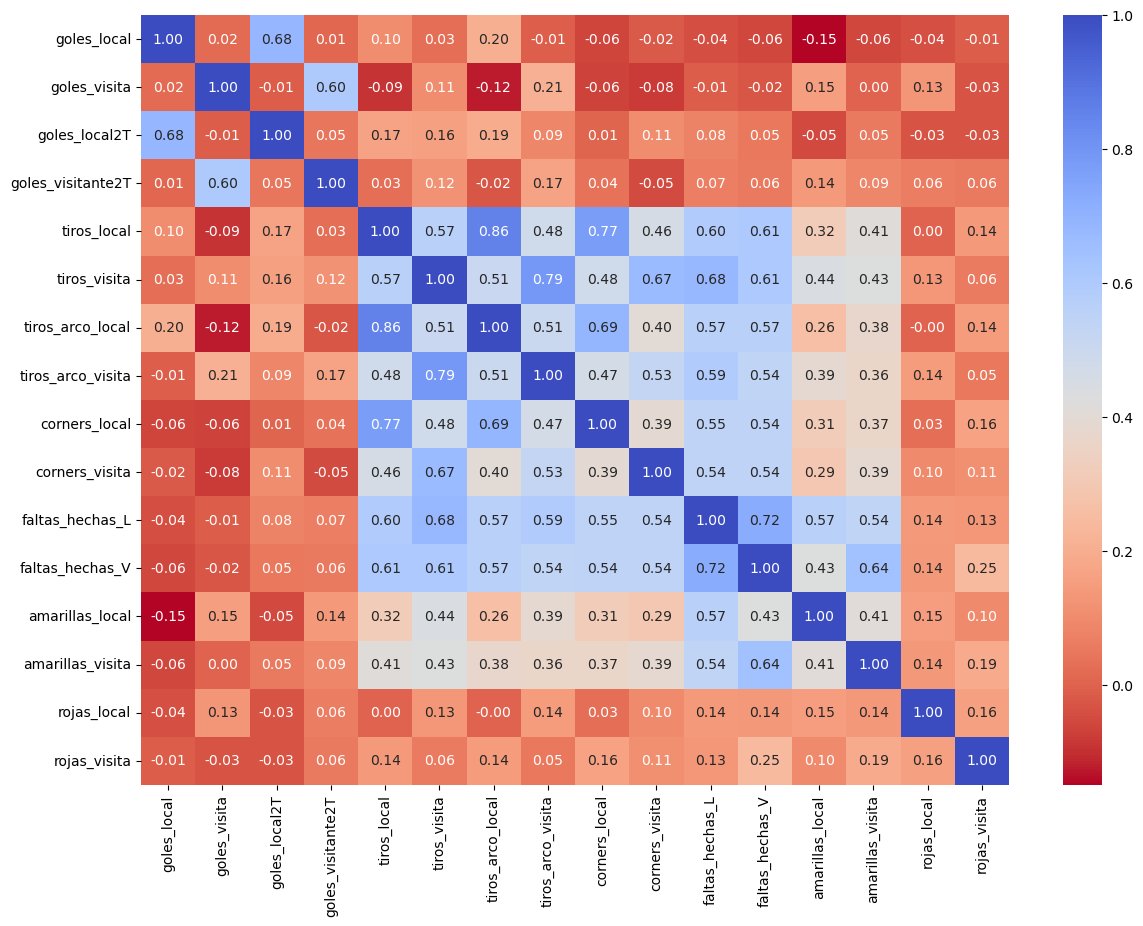

In [13]:
import seaborn as sns
corr_liv = liverpool_local.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(corr_liv,
            annot=True,
            fmt='.2f',
            cmap=plt.cm.coolwarm_r,
           )
plt.show()

In [14]:
liverpool_local_dummy = pd.get_dummies(liverpool_local["resultado"], prefix="resultados")
liverpool_local_dummy.head()

,resultados_A,resultados_D,resultados_H
3,0,0,1
39,1,0,0
48,0,0,1
75,1,0,0
101,0,1,0


In [15]:
liverpool_visitante_dummy = pd.get_dummies(liverpool_visitante["resultado"], prefix="resultados")
liverpool_visitante_dummy.tail()

,resultados_A,resultados_D,resultados_H
11015,1,0,0
11033,1,0,0
11075,1,0,0
11086,1,0,0
11112,0,1,0


In [16]:
print("Liverpool de local"),print(liverpool_local_dummy.sum())
print()
print("Liverpool de visitante"),print(liverpool_visitante_dummy.sum())

Liverpool de local
resultados_A     72
resultados_D    132
resultados_H    347
dtype: int64

Liverpool de visitante
resultados_A    240
resultados_D    138
resultados_H    174
dtype: int64


(None, None)

* **RESULTADOS DE LOCAL : 347 VICTORIAS - 132 EMPATES - 72 DERROTAS**


* **RESULTADOS DE VISITANTE : 240 VICTORIAS - 138 EMPATES - 174 DERROTAS**

----

In [17]:
liverpool_local.describe()

,goles_local,goles_visita,goles_local2T,goles_visitante2T,tiros_local,tiros_visita,tiros_arco_local,tiros_arco_visita,corners_local,corners_visita,faltas_hechas_L,faltas_hechas_V,amarillas_local,amarillas_visita,rojas_local,rojas_visita
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,2.005445,0.794918,0.847550,0.297641,12.911071,5.814882,5.825771,2.491833,5.506352,2.753176,7.615245,8.537205,0.742287,1.301270,0.029038,0.070780
std,1.410985,0.881967,0.958402,0.541357,8.902159,4.382427,4.461813,2.202360,4.251145,2.529977,5.370362,6.170750,0.947153,1.347043,0.168066,0.263679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,5.500000,0.500000,1.000000,0.000000,0.500000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,15.000000,6.000000,6.000000,2.000000,6.000000,3.000000,8.000000,9.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,19.000000,9.000000,9.000000,4.000000,8.000000,4.000000,11.000000,13.000000,1.000000,2.000000,0.000000,0.000000
max,7.000000,4.000000,4.000000,3.000000,37.000000,20.000000,20.000000,15.000000,20.000000,13.000000,24.000000,27.000000,5.000000,7.000000,1.000000,2.000000


In [18]:
liverpool_visitante.describe()

,goles_local,goles_visita,goles_local2T,goles_visitante2T,tiros_local,tiros_visita,tiros_arco_local,tiros_arco_visita,corners_local,corners_visita,faltas_hechas_L,faltas_hechas_V,amarillas_local,amarillas_visita,rojas_local,rojas_visita
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,1.177536,1.519928,0.503623,0.612319,7.469203,9.963768,3.427536,4.637681,3.423913,4.277174,8.442029,8.440217,1.152174,1.211957,0.076087,0.052536
std,1.104849,1.351064,0.722961,0.795902,5.496324,7.012987,3.040292,3.703517,2.964033,3.600411,5.990335,5.856733,1.214864,1.252367,0.285157,0.246487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.750000,4.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.750000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,8.000000,11.000000,3.000000,5.000000,3.000000,4.000000,9.000000,10.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,12.000000,15.000000,5.000000,7.000000,5.250000,7.000000,13.000000,13.000000,2.000000,2.000000,0.000000,0.000000
max,7.000000,7.000000,5.000000,4.000000,24.000000,30.000000,16.000000,15.000000,15.000000,17.000000,25.000000,25.000000,6.000000,6.000000,2.000000,2.000000


**Observación** 
* La media de gol como local , es alrededor de 2 goles por partidos, como visitante es de 1.5
* Tiene una media de 0.79 en goles recibidos de local. De vistante tiene una media de 1.1 (se puede ver que es mas factible recibir un gol de visitante que de local aun que no es mucha la diferencia)
* En los 2T el liverpool tiene casi una media de 1 gol por cada 2T jugado de local, de visitante es bajo 0.6.
* Los tiros de Local Ronda los 17 tiros (al arco van alrdedor de 7). En cambio de visitante tiene 13 (al arco van alrededor de 6).
* Se puede ver que es de cometer el mismo porcentaje de faltas tanto de visitante y local (11 como visitante y 10 como local) 

----

# Hacemos una regresion lineal.

In [19]:
lm = smf.ols(formula="goles_local~goles_local2T+tiros_arco_local+corners_local+tiros_local",data=liverpool_local).fit()
lm.params

Intercept           1.224172
goles_local2T       0.947498
tiros_arco_local    0.102960
corners_local      -0.060209
tiros_local        -0.022466
dtype: float64

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            goles_local   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.56e-81
Time:                        14:19:21   Log-Likelihood:                -778.80
No. Observations:                 551   AIC:                             1568.
Df Residuals:                     546   BIC:                             1589.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2242      0.082     14.946      0.000       1.063       1.385
goles_local2T        0.9475      0.046     20.463      0.000       0.857       1.038
tiros_arco_local     0.1030      0.019      5.512      0.000       0.066       0.140
corners_local       -0.0602      0.016     -3.717      0.000      -0.092      -0.028
tiros_local         -0.0225      0.011     -2.107      0.036      -0.043      -0.002
==============================================================================
Omnibus:                       34.262   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.587
Skew:                           0.657   Prob(JB):                     2.53e-09
Kurtosis:                       3.003   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observación** 
* Se puede ver que hay un incremento de un gol (

In [21]:
lm.rsquared_adj

0.4986704813240601

**Observación** 
* No es un buen resultado pero, veremos si lo podremos mejorar

In [22]:
liverpool_local_pred = lm.predict(liverpool_local[["goles_local2T","tiros_arco_local","corners_local","tiros_local"]])

In [23]:
SSD = sum((liverpool_local["goles_local"] - liverpool_local_pred)**2)
RSE = np.sqrt(SSD / (len(liverpool_local)-2-1))
pred_m = np.mean(liverpool_local["goles_local"])
error = RSE / pred_m
print("el error del modelo creado es de: %",error*100)

el error del modelo creado es de: % 49.725536450511015


---------
# Vamos a validar el modelo, pero a simple vista tendremos un resultado bastante bajo. luego intentare con otras variables predictoras.
* # Lo que si podria hacer es agregar la variables dummy creada (son los resultados de cada partido).luego voy hacer un random forest para las variables resultado y ver su predicción.


In [24]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [25]:
futuras_cols = ["goles_local2T","tiros_arco_local","corners_local","tiros_local","faltas_hechas_V",
                "rojas_visita","amarillas_visita"]
x = liverpool_local[futuras_cols]
y = liverpool_local["goles_local"]

In [26]:
estimador = SVR(kernel="linear")
selector = RFE(estimador, n_features_to_select=3, step=1)
selector = selector.fit(x,y)
print(selector.ranking_)
print(selector.support_)

[1 2 3 5 4 1 1]
[ True False False False False  True  True]


**Nos explica que las mejores variables que podremos usar para predecir, pero haciendo el modelo con dichas variables me arrojo un resultado de %46. Haciendo con todas creadas (futuras_cols) me arroja un resultado un poco mas alto.**


----

In [27]:
x_pred = x[["goles_local2T","tiros_arco_local","corners_local","tiros_local","faltas_hechas_V","rojas_visita"]]
lm1 = LinearRegression()
lm1.fit(x_pred,y)

LinearRegression()

In [28]:
lm1.coef_

array([ 0.94080152,  0.11000732, -0.05303967, -0.01361005, -0.03597847,
        0.18530349])

In [29]:
print(f"R2: %{lm1.score(x_pred,y)*100:.2f}")

R2: %51.70


**Observación**
* Tenemos un resultado muy bajo 51.70, intentaremos con otros modelo.
----

# Ahora haremos una regresión lineal con todos los datos y agregando el resultado de cada partido pero pasado a valores numericos.

In [30]:
subset_liverpool_local = ['goles_local','goles_visita','goles_local2T', 'goles_visitante2T','tiros_local', 'tiros_visita',
                    'tiros_arco_local', 'tiros_arco_visita', 'corners_local','corners_visita','faltas_hechas_L',
                    'faltas_hechas_V','amarillas_local', 'amarillas_visita', 'rojas_local','rojas_visita']
subset_liverpool_local = liverpool_local[subset_liverpool_local]

resultados_liv = pd.concat([subset_liverpool_local,liverpool_local_dummy], axis=1)
resultados_liv.tail()

,goles_local,goles_visita,goles_local2T,goles_visitante2T,tiros_local,tiros_visita,tiros_arco_local,tiros_arco_visita,corners_local,corners_visita,faltas_hechas_L,faltas_hechas_V,amarillas_local,amarillas_visita,rojas_local,rojas_visita,resultados_A,resultados_D,resultados_H
11026,2,0,1.0,0.0,22.0,5.0,11.0,1.0,7.0,6.0,11.0,7.0,1.0,0.0,0.0,0.0,0,0,1
11043,3,1,0.0,0.0,29.0,6.0,8.0,1.0,9.0,4.0,7.0,8.0,0.0,1.0,0.0,0.0,0,0,1
11050,6,0,3.0,0.0,23.0,3.0,15.0,2.0,4.0,0.0,5.0,11.0,0.0,3.0,0.0,0.0,0,0,1
11067,1,0,1.0,0.0,22.0,13.0,5.0,5.0,4.0,6.0,7.0,7.0,2.0,1.0,0.0,0.0,0,0,1
11092,2,0,1.0,0.0,20.0,5.0,3.0,2.0,9.0,3.0,9.0,8.0,1.0,1.0,0.0,0.0,0,0,1


In [31]:
X = subset_liverpool_local
Y = liverpool_local_dummy[["resultados_A","resultados_D" , "resultados_H"]]

In [32]:
lm2 = LinearRegression()
lm2.fit(X,Y)

LinearRegression()

In [33]:
print(lm2.intercept_) #aca imprimimos la intercepcion "Total Spend"
print()
print(lm2.coef_) #aca imprimimos los coeficientes 

[0.22022323 0.41573443 0.36404234]

[[-0.10354458  0.17217643  0.00525394  0.02092374  0.00056426 -0.00915984
   0.00297805  0.01156114 -0.00706118  0.00298529  0.00735982 -0.00511469
  -0.0060747  -0.00664423  0.05080617  0.0047342 ]
 [-0.13192132  0.07493133  0.00760871 -0.05566472  0.00607969 -0.00342685
  -0.00430649  0.00586092  0.00289406 -0.00461132 -0.00394675  0.00263072
   0.01440644 -0.00312232 -0.17545483 -0.08925721]
 [ 0.23546591 -0.24710776 -0.01286265  0.03474098 -0.00664395  0.01258669
   0.00132845 -0.01742206  0.00416713  0.00162603 -0.00341307  0.00248397
  -0.00833174  0.00976655  0.12464865  0.08452301]]


In [34]:
lm2.score(X,Y)

0.40816567276043686

**Observación**
* Tenemos un resultado otra vez realmente bajo. crearemos otro modelo con otro tipo de algoritmo
* agregando todos se puede ver que el modelo fue decreciendo y nos arrojo un valor de %40.81

------
# Árbol de decisión

In [35]:
subset_liverpool_local = pd.concat([subset_liverpool_local,liverpool_local["resultado"]] , axis=1)
subset_liverpool_local.head()

,goles_local,goles_visita,goles_local2T,goles_visitante2T,tiros_local,tiros_visita,tiros_arco_local,tiros_arco_visita,corners_local,corners_visita,faltas_hechas_L,faltas_hechas_V,amarillas_local,amarillas_visita,rojas_local,rojas_visita,resultado
3,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
39,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
48,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
75,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
101,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D


In [36]:
columnas = subset_liverpool_local.columns.values.tolist()
predictoras = columnas[:15]
target = columnas[16]

In [37]:
subset_liverpool_local["train"] = (np.random.uniform(0,1,len(subset_liverpool_local))<=0.75).astype(int)

(array([150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 401.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

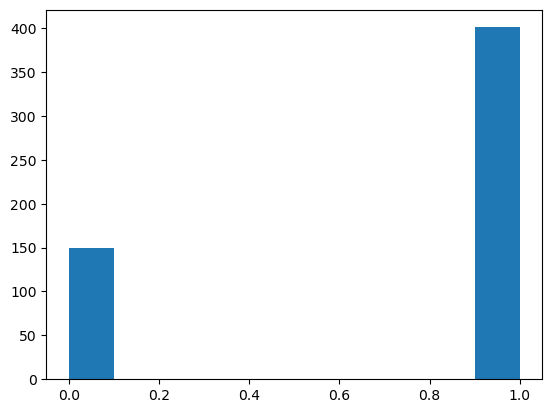

In [38]:
plt.hist(subset_liverpool_local.train)

In [39]:
from sklearn.tree import DecisionTreeClassifier
#### Separamos variables de entrenamiento y testing
train , test = subset_liverpool_local[subset_liverpool_local["train"] == True] , subset_liverpool_local[subset_liverpool_local["train"] == False]

In [40]:
tree = DecisionTreeClassifier(criterion="entropy" , min_samples_split=25 , random_state=42)
tree.fit(train[predictoras] , train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=25,
                       random_state=42)

In [41]:
preds = tree.predict(test[predictoras])
pd.crosstab(test[target], preds,rownames=["actual"] , colnames=["predictions"])

predictions,A,D,H
actual,,,
A,16,1,0
D,0,37,2
H,0,0,94


**Observación**
* Al parecer clasifico casi todos lo resultados bien, solamente en 3 oportunidades clasifico mal: **dio como resultado 2 victorias a los que eran 2 empates, y predijo mal 1 derrota prediciendo un empate.**

In [42]:
from sklearn.tree import export_graphviz
import pydot
from PIL import Image

In [45]:
export_graphviz(tree,out_file="arbol_dot_EPL",class_names=predictoras,feature_names=predictoras,impurity=False,filled=True)

In [46]:
import pydot
(graph,) = pydot.graph_from_dot_file("../Trabajos-subidos/arbol_dot_EPL")
graph.write_png("../MisTrabajos/arbol_dot_EPL")

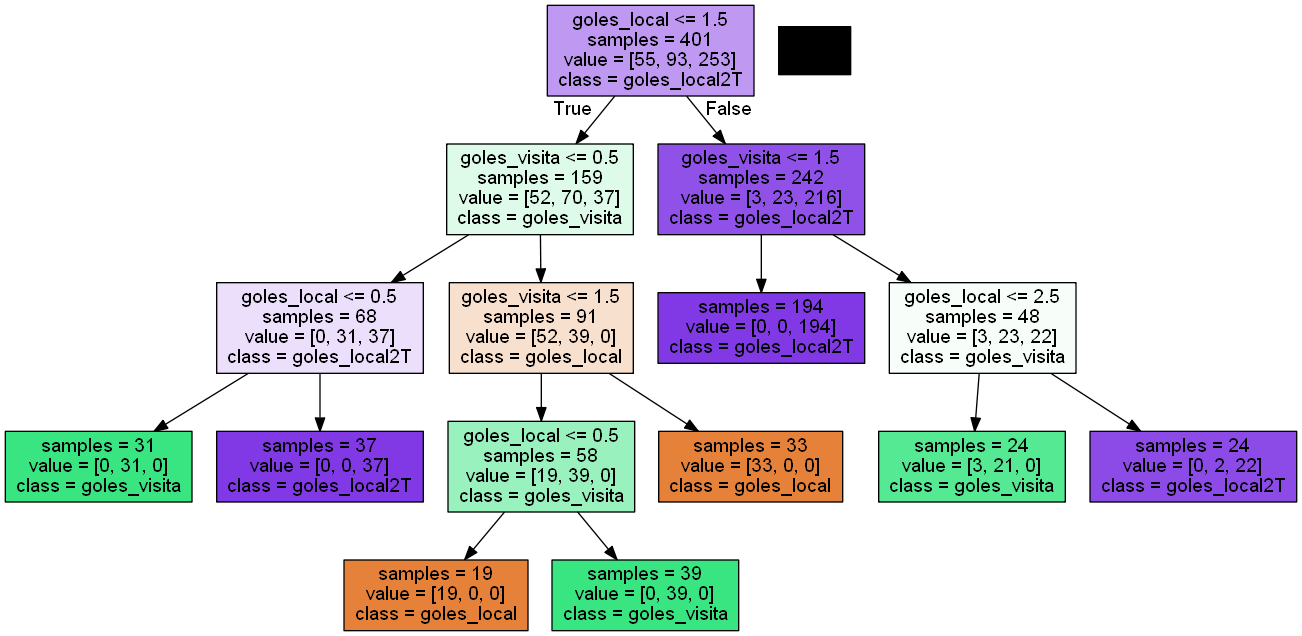

In [47]:
im1 = Image.open("../MisTrabajos/arbol_dot_EPL")
im1

## Mostramos graficamente el resultad del árbol de decisión.

---

In [68]:
print(f"Eficacia del modelo: %{tree.score(test[predictoras], test[target])*100:.2f}")

Eficacia del modelo: %98.67


**Observación**
* Obtuvimos un resultado casi excelente, lo que haremos ahora es hacer una valicación cruzada para ver como se comporta el modelo y explicar la precisión del modelo.
* **EFICACIA DEL MODELO %98.67**
-----
# Validación cruzada & Randome forest.

In [59]:
import sklearn.metrics
from sklearn.model_selection import KFold
###
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [52]:
X = subset_liverpool_local[predictoras]
Y = subset_liverpool_local[target]

In [54]:
tree = DecisionTreeClassifier(criterion="entropy" , max_depth=5 , min_samples_split=25,random_state=42)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=25,
                       random_state=42)

In [57]:
validacion = KFold(n_splits=150 , shuffle=True ,random_state=42)

In [70]:
score = np.mean(cross_val_score(tree,X,Y,scoring="accuracy" , cv=validacion , n_jobs=1))
print(f"Eficacia del modelo con la validacion cruzada: %{score*100:.2f}")

Eficacia del modelo con la validacion cruzada: %99.33


**Observacipon**
* Hicimos una validación cruzada con 5 grupos y el promedio de la eficacia obtenida por cada una de las divisiones es de %99.33

----

In [64]:
for i in range(1,6):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y) 
    cv = KFold(n_splits=10,shuffle=True, random_state=1) #usamos el mismo CV
    scores=cross_val_score(tree,X,Y,scoring="accuracy",cv=validacion, n_jobs=1) #sacamos los valores de SCORES
    score=np.mean(scores) #aqui sacamos la media de SCORES
    print("score para i =", i , "es de ",score)

score para i = 1 es de  0.715
score para i = 2 es de  0.7622222222222222
score para i = 3 es de  0.9383333333333334
score para i = 4 es de  0.9933333333333333
score para i = 5 es de  0.9933333333333333


**Lo que creamos es un bucle para que vaya variando el numero de n_splits para ver como va variando el resultado sobre la eficacia del modelo.**
**Observación**
* Se puede ver que el modelo fue mejorando apartir de cuando aumentamos la profundidad para crear el arbol a 3

----

In [80]:
forest = RandomForestClassifier(n_jobs=2 , oob_score=True , n_estimators=100)
forest.fit(X,Y)
print(f"Eficacia del modelo para el random forest: %{forest.oob_score_*100:.2f}")

Eficacia del modelo para el random forest: %95.83


**Observación**
* El modelo con el random forest decrecio un poco solamente unos 3 puntos a comparación con el arbol de regresion y la validacion cruzada.

# RESUMEN: 

* ## Con la regresión lineal no tuvimos buenos resultados, el mas alto fue de %51,70 de eficacia.
* ## Luego creado el arbol de decision con todos las variables predictoras posibles, aumento drasticamente el resultado a un %99 validando el modelo con una "validacion cruzada" utilizando la metrica del "accuracy. Luego lo que hice fue es crear un random forest para seguir viendo el comportamiento del modelo y se puede ver que apenas bajo unos 3 puntos(%95.83). Es decir que también sigue siendo un resultado mas que bueno.

----
* ### Explicacion: Un árbol de decisión es un algoritmo de aprendizaje supervisado que divide los datos en ramas y hojas para predecir la variable objetivo. El árbol se construye dividiendo los datos en función de la variable predictoras que maximizan la separación entre las categorías de la variable objetivo.El objetivo en este caso era predeccir resultados de partidos a bases de los datos que obtenemos en el dataset